### Import modules

In [26]:
# Standard imports
import pandas as pd
import numpy as np
import xtrack as xt
import matplotlib.pyplot as plt
import copy

### Load collider

In [2]:
# Define study
collider = xt.Multiline.from_json("/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/master_study/scans/injection_oct_scan_correct/base_collider/xtrack_0000/collider.json")

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           


In [3]:
collider.build_trackers()

Compiling ContextCpu kernels...


57d872822cd5458086926f2dadf779cb.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 57d872822cd5458086926f2dadf779cb.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


227088616da545acb0245f6584048668.c:4389: warning: "_GNU_SOURCE" redefined
 #  define _GNU_SOURCE // enable GNU libc NAN extension if possible
 
In file included from 227088616da545acb0245f6584048668.c:50:
/afs/cern.ch/work/c/cdroin/private/example_DA_study_dev/miniforge/include/python3.10/pyconfig.h:1621: note: this is the location of the previous definition
 #define _GNU_SOURCE 1
 


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


### Twiss and plot

In [4]:
tw_b1 = collider.lhcb1.twiss()

array([0.00000000e+00, 0.00000000e+00, 4.39061436e-02, ...,
       6.22868129e+01, 6.23047718e+01, 6.23047718e+01])

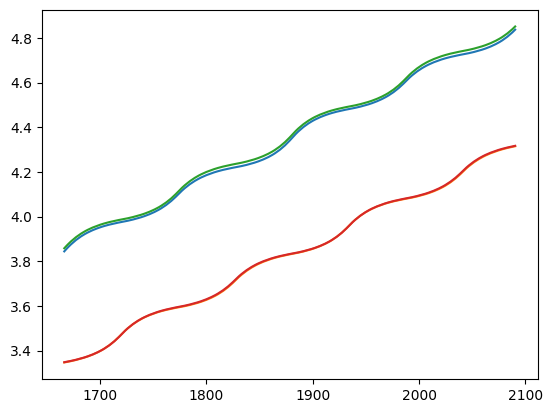

In [36]:
collider.vars['phase_change.b1'] = 1.
collider.vars['phase_change.b2'] = 1.
tw_b1 = collider.lhcb1.twiss()
plt.plot(tw_b1[['s']][5000:6000], tw_b1[['mux']][5000:6000]%(2*np.pi))
plt.plot(tw_b1[['s']][5000:6000], tw_b1[['muy']][5000:6000]%(2*np.pi))
mu1 = copy.deepcopy(tw_b1[['mux']])

collider.vars['phase_change.b1'] = 0.
collider.vars['phase_change.b2'] = 0.
tw_b1 = collider.lhcb1.twiss()
mu2 = copy.deepcopy(tw_b1[['mux']])

plt.plot(tw_b1[['s']][5000:6000], tw_b1[['mux']][5000:6000]%(2*np.pi))
plt.plot(tw_b1[['s']][5000:6000], tw_b1[['muy']][5000:6000]%(2*np.pi))
plt.show()

In [34]:
print(np.sum(mu1-mu2))

4576.216959441339


In [24]:
collider.vars['phase_change.b1']._info()

#  vars['phase_change.b1']._get_value()
   vars['phase_change.b1'] = 0.0

#  vars['phase_change.b1']._expr is None

#  vars['phase_change.b1']._find_dependant_targets()
   vars['kqtf.a67b1']
   eref['lhcb1']['mqt.14r6.b1..1'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..2'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..3'].knl[1]
   ... set _info(limit=None) to get all lines



In [28]:
collider.lhcb1.vars['phase_change.b1']._info()

#  vars['phase_change.b1']._get_value()
   vars['phase_change.b1'] = 0.0

#  vars['phase_change.b1']._expr is None

#  vars['phase_change.b1']._find_dependant_targets()
   vars['kqtf.a67b1']
   eref['lhcb1']['mqt.14r6.b1..1'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..2'].knl[1]
   eref['lhcb1']['mqt.14r6.b1..3'].knl[1]
   ... set _info(limit=None) to get all lines

